In [1]:
import numpy as np  
import matplotlib.pyplot as plt  # Importation de matplotlib pour la visualisation des données
plt.style.use('fivethirtyeight')  # Appliquer le style "fivethirtyeight" pour les graphiques
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout # Importation de différents types de couches de réseaux de neurones
from keras.optimizers import Adam
import math  # Importation de la bibliothèque math pour des opérations mathématiques de base
from sklearn.metrics import mean_squared_error

In [50]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real Apple Stock Price')
    # Tracer les prédictions (valeurs prédites) en bleu
    plt.plot(predicted, color='blue', label='Predicted Apple Stock Price')
    # Ajouter un titre au graphique
    plt.title('Apple Stock Price Prediction')
    # Ajouter des étiquettes aux axes X et Y
    plt.xlabel('Time')  # L'axe des X représente le temps
    plt.ylabel('Apple Stock Price')  # L'axe des Y représente le prix de l'action Apple
    # Ajouter une légende pour expliquer les couleurs des lignes
    plt.legend()
    # Afficher le graphique
    plt.show()  # Afficher le graphique généré

# Fonction pour calculer le root mean squared error (RMSE)
def return_rmse(test, predicted): 
    # RMSE (Root Mean Squared Error) est une mesure statistique utilisée pour évaluer les différences 
    # entre des valeurs observées (réelles) et des valeurs prédites par un modèle
    # Calcul du RMSE en prenant la racine carrée de l'erreur quadratique moyenne
    rmse = math.sqrt(mean_squared_error(test, predicted))
    # Affichage du RMSE avec un message explicatif
    print("The root mean squared error is {}.".format(rmse))

In [18]:
dataset = pd.read_csv('AAPL.xls',index_col='Date', parse_dates=['Date'])

In [19]:
dataset.head()
print(len(dataset))

1259


In [24]:
training_set = dataset[:'2016'].iloc[:, 0:1].values  # Extraction des données d'entraînement (High)
# le training_set ne contient que les prix les plus élevés atteints chaque jour.
test_set = dataset['2017':].iloc[:, 0:1].values  # Extraction des données de test

In [25]:
print(training_set[:5])

[[79.117142]
 [78.26857 ]
 [76.709999]
 [74.571426]
 [75.601425]]


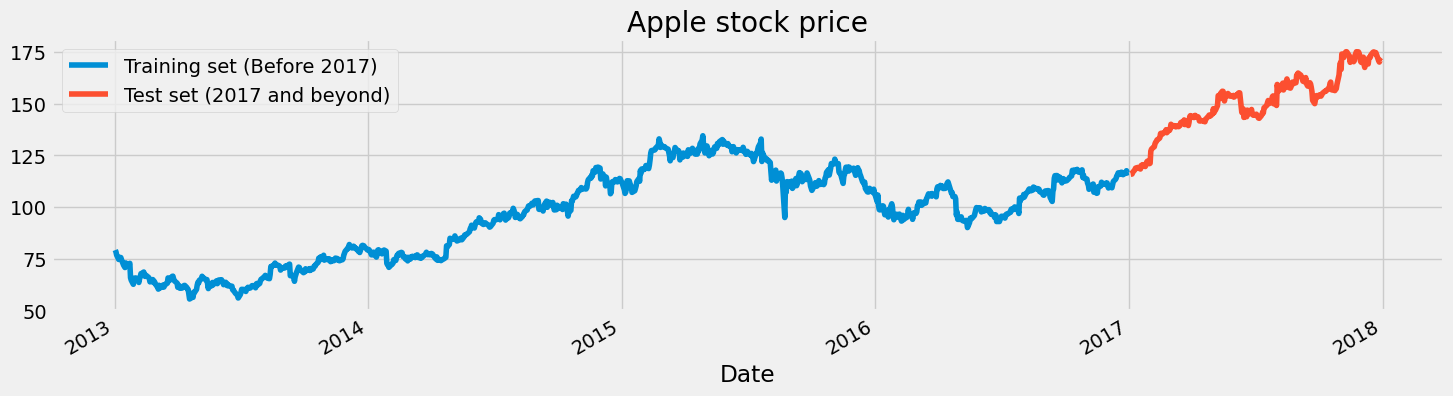

In [26]:
dataset["Open"][:'2016'].plot(figsize=(16,4), legend=True)  # Créer un graphique avec taille personnalisée
dataset["Open"]['2017':].plot(figsize=(16,4), legend=True)  # Même taille de graphique pour cohérence

# Open : Prix d'ouverture des actions le matin au début de la séance de trading.
# Ajouter une légende pour identifier les deux ensembles
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
# Ajouter un titre au graphique
plt.title('Apple stock price')
# Afficher le graphique
plt.show()  # Afficher le graphique avec les ensembles d'entraînement et de test

In [27]:
sc = MinMaxScaler(feature_range=(0,1))  # Créer un scaler avec une échelle de 0 à 1
training_set_scaled = sc.fit_transform(training_set)  # Ajuster le scaler et transformer les données
training_set_scaled 

array([[0.29977402],
       [0.28903746],
       [0.26931763],
       ...,
       [0.78566641],
       [0.77212823],
       [0.77465879]])

In [37]:
X_train = []  
y_train = [] 

In [38]:
for i in range(15, 1008): 
    X_train.append(training_set_scaled[i-15:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [39]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Redimensionner en 3 dimensions
print(X_train.shape[0], X_train.shape[1], 1)

993 15 1


In [56]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  # Dropout avec un taux de 20%

# Deuxième couche LSTM avec Dropout
regressor.add(LSTM(units=50, return_sequences=True))  # Conserve la séquence pour la prochaine couche LSTM
regressor.add(Dropout(0.2))  # Dropout de 20%

# Troisième couche LSTM avec Dropout
regressor.add(LSTM(units=50, return_sequences=True))  # Ajoute une autre couche LSTM
regressor.add(Dropout(0.2))  # Dropout de 20%

# Quatrième couche LSTM
regressor.add(LSTM(units=50))  # Ne retourne pas de séquences car c'est la dernière couche LSTM
regressor.add(Dropout(0.2))  # Dropout de 20%

# La couche de sortie
regressor.add(Dense(units=1))  # La sortie est une seule valeur prédite
adam = Adam(learning_rate=0.001)
# Compilation du RNN avec l'optimiseur RMSprop et la fonction de perte Mean Squared Error (MSE)
regressor.compile(optimizer=adam, loss='mean_squared_error')  # Compilation du modèle
# regressor.compile(optimizer='rmsprop', loss='mean_squared_error')  # Compilation du modèle

# Ajustement du modèle avec 50 époques et une taille de lot de 32
regressor.fit(X_train, y_train, epochs=50, batch_size=16)  # Entraînement du modèle

C:\Users\Fatin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0879
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0098
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0065
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0068
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0058
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0059
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0061
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0055
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0052
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0049
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0054
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0063
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0042
Epo

In [57]:
dataset_total = pd.concat((dataset["Open"][:'2016'], dataset["Open"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 15:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
inputs

array([[0.71974686],
       [0.73214635],
       [0.73910517],
       [0.75428824],
       [0.75859004],
       [0.77238133],
       [0.76390417],
       [0.77579747],
       [0.77655668],
       [0.77086299],
       [0.76124706],
       [0.7730139 ],
       [0.78566641],
       [0.77212823],
       [0.77465879],
       [0.76390417],
       [0.76453673],
       [0.76542241],
       [0.77630358],
       [0.79110699],
       [0.80148204],
       [0.80110248],
       [0.80312693],
       [0.80578394],
       [0.79604145],
       [0.81704466],
       [0.80945318],
       [0.82273825],
       [0.81704466],
       [0.81135107],
       [0.82235869],
       [0.83817432],
       [0.84412101],
       [0.82881149],
       [0.83159507],
       [0.90599177],
       [0.91801171],
       [0.92218697],
       [0.93256211],
       [0.950402  ],
       [0.96065069],
       [0.96444629],
       [0.97469499],
       [0.98253948],
       [0.98747394],
       [1.01341162],
       [1.01530942],
       [1.008

In [58]:
X_test = []
for i in range(15, 252):
    X_test.append(inputs[i - 15:i, 0])  # Ajoute les 60 éléments précédents à chaque séquence de test
    
# Convertir la liste en tableau NumPy pour une utilisation avec le modèle LSTM
X_test = np.array(X_test)

# Reshape le tableau pour qu'il ait 3 dimensions : (nombre de séquences, nombre de timesteps, nombre de caractéristiques)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prédire les prix des actions avec le modèle LSTM formé
predicted_stock_price = regressor.predict(X_test)

# Inverser la mise à l'échelle pour ramener les prédictions à leurs valeurs d'origine
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step


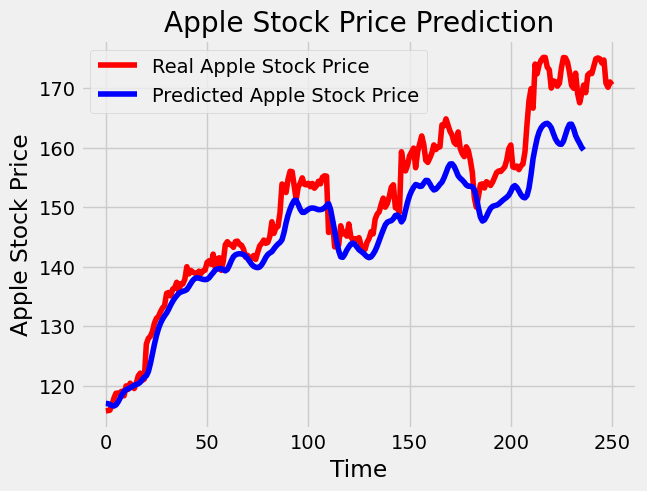

In [59]:
plot_predictions(test_set,predicted_stock_price)